In [1]:
import matplotlib.pyplot as plt

# No numpy code, pure python

# Initialize image

In [69]:
image = []
for i in range(8):
    row = []
    for j in range(8):
        if i!=0 and i!=7 and j in range(1,7):
            row.append(1)
        else:
            row.append(0)
    image.append(row)

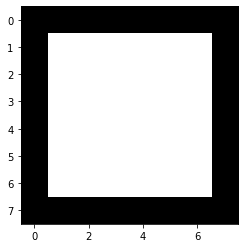

In [70]:
plt.imshow(image, 'gray')

In [71]:
image

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

# Main functionality

## transposing

In [72]:
def transpose(image):
    transposed_image = []
    n = len(image)
    m = len(image[0])
    for i in range(m):
        row = []
        for j in range(n):
            row.append(image[j][i])
        transposed_image.append(row)
    return transposed_image

### small test

In [73]:
transpose([[2,4, 4],
         [5,3,1]])

[[2, 5], [4, 3], [4, 1]]

## matrix product

In [74]:
def elementwise_mul(vec1,vec2):
    result = []
    for i in range(len(vec1)):
        result.append(vec1[i]*vec2[i])
    return result

In [75]:
def dot(image1, image2):
    new_image = []
    n = len(image1)
    m = len(image2[0])
    for i in range(n):
        new_row = []
        row1 = image1[i]
        for j in range(m):
            col2 = [el[j] for el in image2]
            new_row.append(sum(elementwise_mul(row1, col2)))
        new_image.append(new_row)
    return new_image

### small test

In [76]:
dot([[2,5,3],[1,5,2]], [[1,0],[0,1],[1,0]])

[[5, 5], [3, 5]]

## rotation of image

In [77]:
def init_identity(image, main=False):
    n = len(image)
    m = len(image[0])
    new_image = []
    for i in range(n):
        new_row = []
        for j in range(m):
            if main:
                if j!=i:
                    new_row.append(0)
                else:
                    new_row.append(1)
            else:
                if j!=m-i-1:
                    new_row.append(0)
                else:
                    new_row.append(1)
        new_image.append(new_row)
    return new_image

### small test

In [78]:
init_identity(image)

[[0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0]]

In [79]:
def rotate(image, angle=90):
    identity = init_identity(image)
    rotated = image
    if angle<0:
        for i in range(abs(angle)//90):
            rotated = dot(identity, transpose(rotated))
    else:
        for i in range(angle//90):
            rotated = dot(transpose(rotated), identity)
    return rotated

### small test

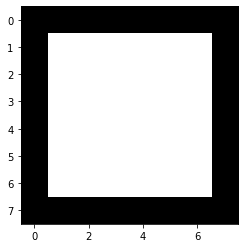

In [80]:
plt.imshow(rotate(image, -90), 'gray')

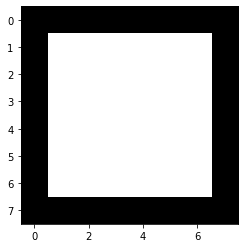

In [81]:
plt.imshow(rotate(image, 90), 'gray')

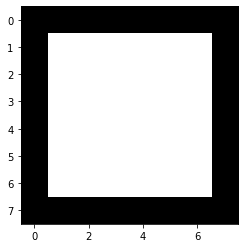

In [82]:
plt.imshow(rotate(image, 180), 'gray')

# Finding countour

In [83]:
def invert(image):
    n = len(image)
    m = len(image[0])
    inverted = []
    for i in range(n):
        row = image[i]
        new_row = []
        for j in range(m):
            if row[j]==0:
                new_row.append(1)
            else:
                new_row.append(0)
        inverted.append(new_row)
    return inverted

In [84]:
def elementwise_or(vec1, vec2):
    new_vec = []
    m = len(vec1)
    for i in range(m):
        new_vec.append(vec1[i] or vec2[i])
    return new_vec

In [85]:
def matrix_or(matrix1, matrix2):
    n = len(matrix1)
    new_matrix = []
    for i in range(n):
        new_matrix.append(elementwise_or(matrix1[i], matrix2[i]))
    return new_matrix

In [86]:
def init_shift_matrix(matrix):
    n = len(matrix)
    m = len(matrix[0])
    shift_matrix = []
    for i in range(n):
        row = matrix[i]
        new_row = []
        for j in range(m):
            if j==i+1:
                new_row.append(1)
            else:
                new_row.append(0)
        shift_matrix.append(new_row)
    return shift_matrix

In [87]:
def find_countour(image):
    inverted = invert(image)
    shift_matrix = init_shift_matrix(image)
    transpose_shift_matrix = transpose(shift_matrix)
    el1 = dot(inverted,shift_matrix)
    el2 = dot(inverted,transpose_shift_matrix)
    el3 = dot(shift_matrix, inverted)
    el4 = dot(transpose_shift_matrix, inverted)
    return matrix_or(inverted, invert(matrix_or(matrix_or(matrix_or(el1, el2), el3), el4)))

### small test

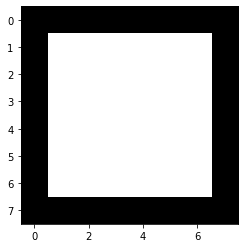

In [88]:
plt.imshow(image, 'gray')

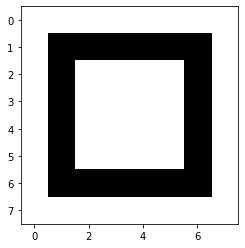

In [89]:
plt.imshow(find_countour(image), 'gray')

# Finding energy 

In [91]:
def find_trace(matrix):
    n = len(matrix)
    trace = 0
    for i in range(n):
        trace+=matrix[i][i]
    return trace

In [92]:
def find_energy(image):
    return find_trace(dot(image,transpose(image)))

In [93]:
find_energy(image)

36